<a href="https://colab.research.google.com/github/Movya777/Data-Science_Projects/blob/main/%F0%9F%94%A5Algerian_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective:
Build models using,
- Linear Regression
- Ridge
- Lasso
- Elasticnet

### Solvable problem
- Regression: predicting FWI


### Dataset Information 📁
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region

The period from June 2012 to Spetember 2012

The dataset includes 11 attributes and 1 output

Output attribute has 2 classes: fire(138 instances), not fire(106 instances)

#### Attribute Information

1. Date: (DD/MM/YYYY) Day, Month (june to sep), year(2012) weather data observations
2. Temp: Noon temperature (max) in celsius (22 to 42)
3. RH: Relative Humidity in %: 21 to 90
4. Ws: Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) from the FWI system: 0 to 18.5
10. Buildup Index (BUI) from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI): 0 to 31.1
12. Classes: Fire and not Fire



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Practice Datasets/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Though all the features are mentioned as object datatypes, many of them are integers. We need to convert them

# Data cleaning

In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### Observation:
The dataset is originally divided into two sets based on region. So, we can add a new column with region before deleting $122^{th}$ row

In [ ]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [ ]:
df['Region']=df['Region'].astype(int)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
#removing the null values
df=df.dropna().reset_index(drop=True)

In [ ]:
df=df.drop(122).reset_index(drop=True)

In [ ]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
# fixing the spaces in the column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


#### changing the datatypes of columns

In [ ]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


#### Generic function to change the datatypes of columns all at once

In [ ]:
objects=[features for features in df.columns if df[features].dtypes == 'O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
for i in objects:
  if i!='Classes':
    df[i]=df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv',index=False)

# Exploratory Data Analysis

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Lets check if we need to build a time-series model or standard regression

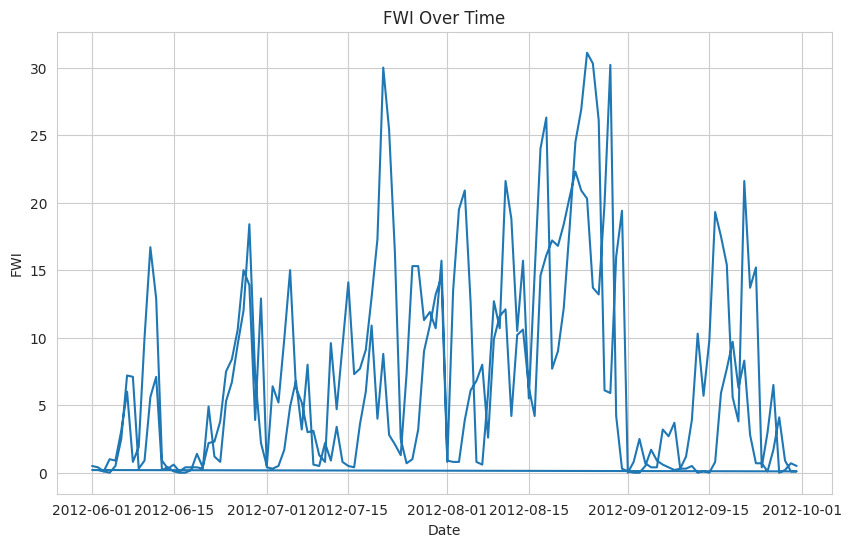

In [ ]:
# Visualizing the trend and seasonality
plt.figure(figsize=(10,6))
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
plt.plot(df['date'], df['FWI'])
plt.xlabel("Date")
plt.ylabel("FWI")
plt.title("FWI Over Time")
plt.show()

For time being we shall ignore date features and focus on other features to predict FWI (Regression Problem)

       year     month       day       FWI
year    NaN       NaN       NaN       NaN
month   NaN  1.000000 -0.000369  0.082639
day     NaN -0.000369  1.000000  0.350781
FWI     NaN  0.082639  0.350781  1.000000


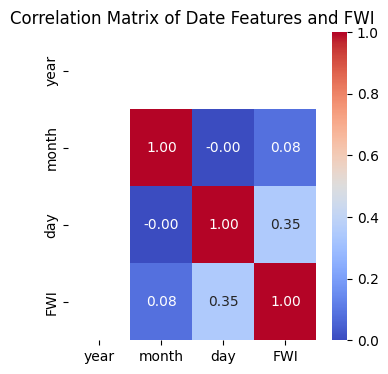

In [ ]:
print(df[['year', 'month', 'day', 'FWI']].corr())

# Visualize the correlation matrix
plt.figure(figsize=(4,4))
sns.heatmap(df[['year', 'month', 'day', 'FWI']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Date Features and FWI')
plt.show()

Observation:

- Since dataset has only one year (2012), it can be dropped.
- Month has very weak correlation with FWI (0.08)
- Day has moderate correlation (0.35)

Since we are not predicting the future FWI outcomes and having only one year (4 months) data, lets drop date features for the moment

In [ ]:
df_copy=df.drop(['day','month','year'],axis=1)
df_copy.drop('date',axis=1,inplace=True)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


🤔🤔🤔HMM!!!
Looks suspicious

This seperation could be due to additional spaces in column names or so...

To solve this, we can use `.str.contains`

In [ ]:
# Encoding Classes feature
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
1,241
0,2


😵😵😵WHAT!!!!!

Before performing encoding I have many classes as not fire, but they converted to 1 instead of 0

In [ ]:
# Encoding Classes feature
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


### Visualizations

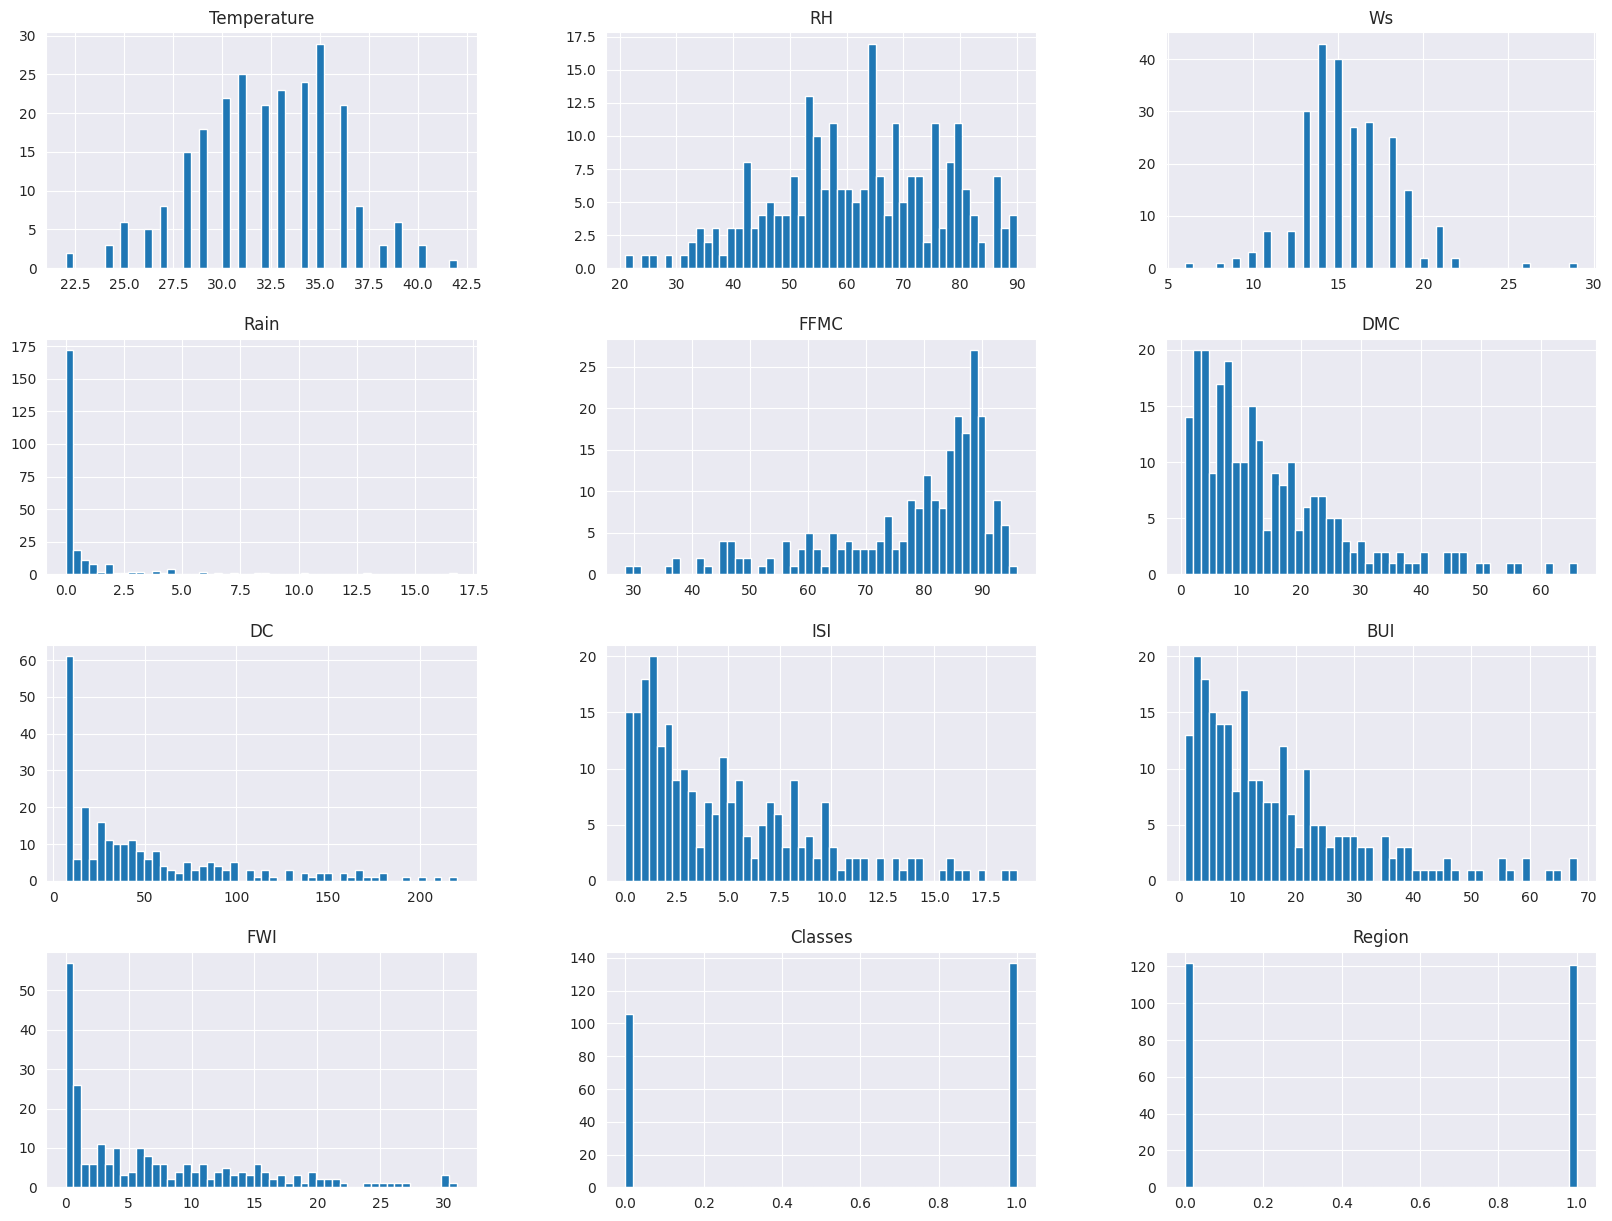

In [ ]:
 ## density plot for all features
sns.set_style('darkgrid')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# Percentage of Classes
percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

,proportion
Classes,
1,56.378601
0,43.621399


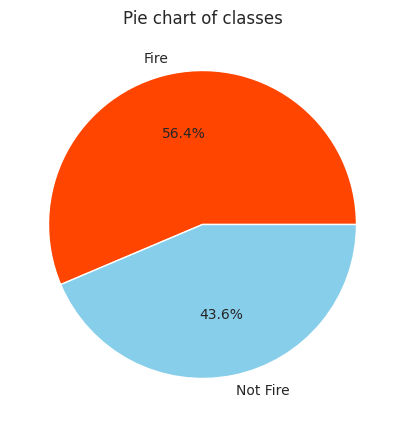

In [ ]:
# Pie chart of classes
classlabels=['Fire','Not Fire']
colors=['#ff4500','skyblue']
plt.figure(figsize=(8,5))
plt.pie(percentage,labels=classlabels,colors=colors,autopct='%1.1f%%')
plt.title('Pie chart of classes')
plt.show()

In [ ]:
|# Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

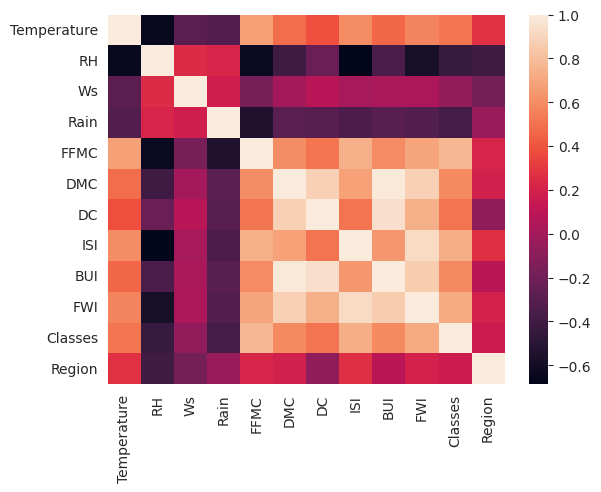

In [ ]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

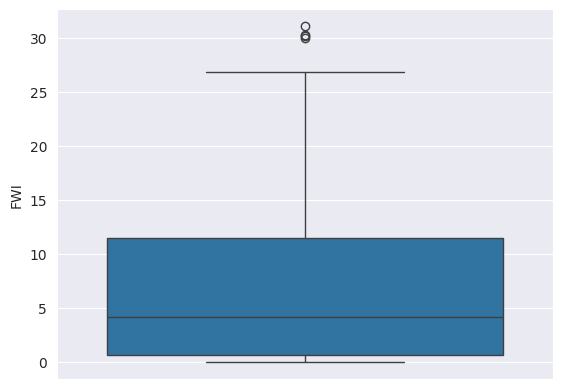

In [ ]:
# Box plot of target variable - FWI
sns.boxplot(df_copy['FWI'])

In [ ]:
# Encoding Classes feature
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regions')

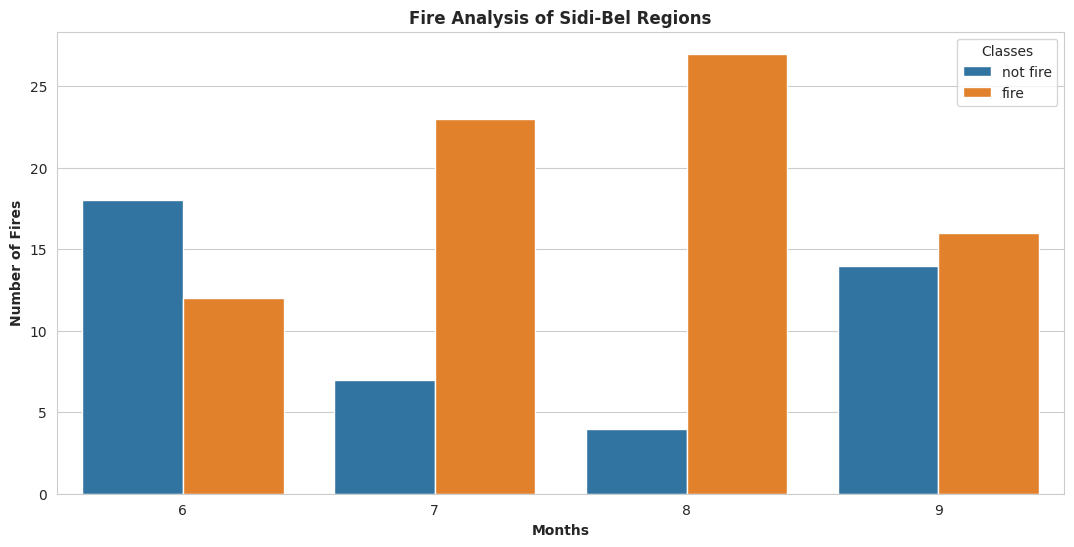

In [ ]:
# Monthly Fire Analysis based on region
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire Analysis of Sidi-Bel Regions', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Regions')

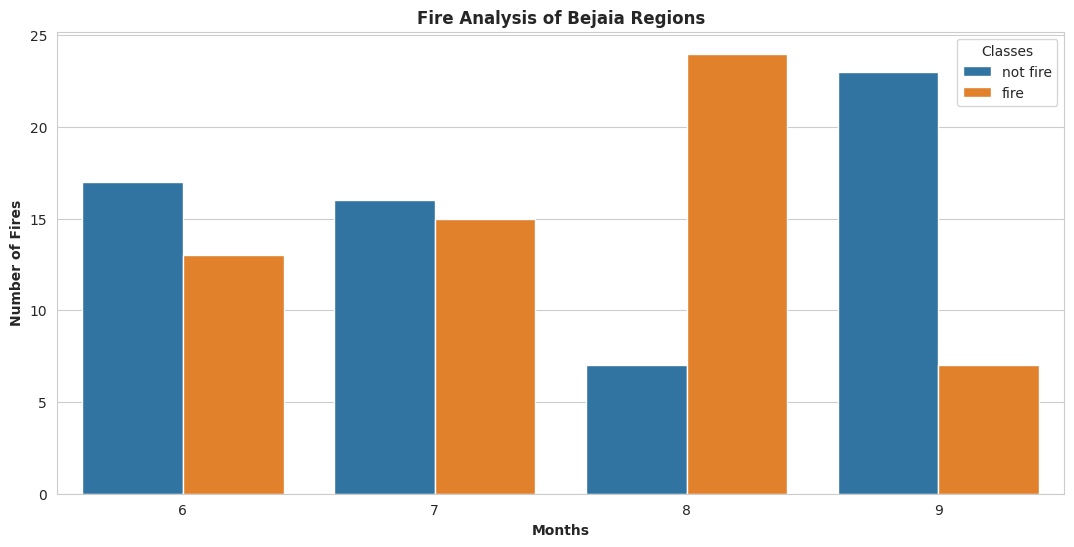

In [ ]:
# Monthly Fire Analysis based on region
dftemp2=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp2)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire Analysis of Bejaia Regions', weight='bold')

Observation:

1. `August` month has most number of forest fires for both the regions

# Model Building preparation

In [ ]:
data=pd.read_csv('/content/Algerian_forest_fires_dataset_cleaned.csv')

In [ ]:
data.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
# Encoding Classes feature
data['Classes']=np.where(data['Classes'].str.contains('not fire'),0,1)

In [ ]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
# Independent and dependent features
X=data.drop('FWI',axis=1)
y=data['FWI']

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

# Feature Selection

<Axes: >

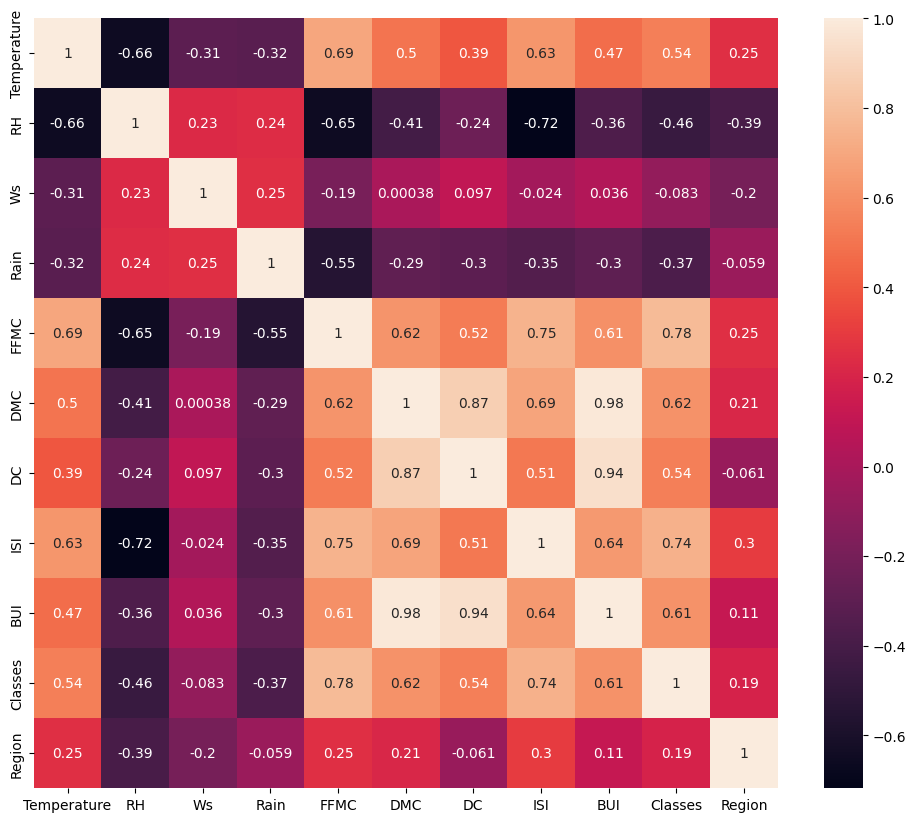

In [ ]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
# check for multicollinearity
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
correlation(X_train,0.9)

{'BUI'}

Observation:

'BUI' has high correlation with 'DMC' (0.98) and 'DC'(0.94).

So, 'BUI' feature can be removed

In general, the threshold value is set up by domain experts

In [ ]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [ ]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

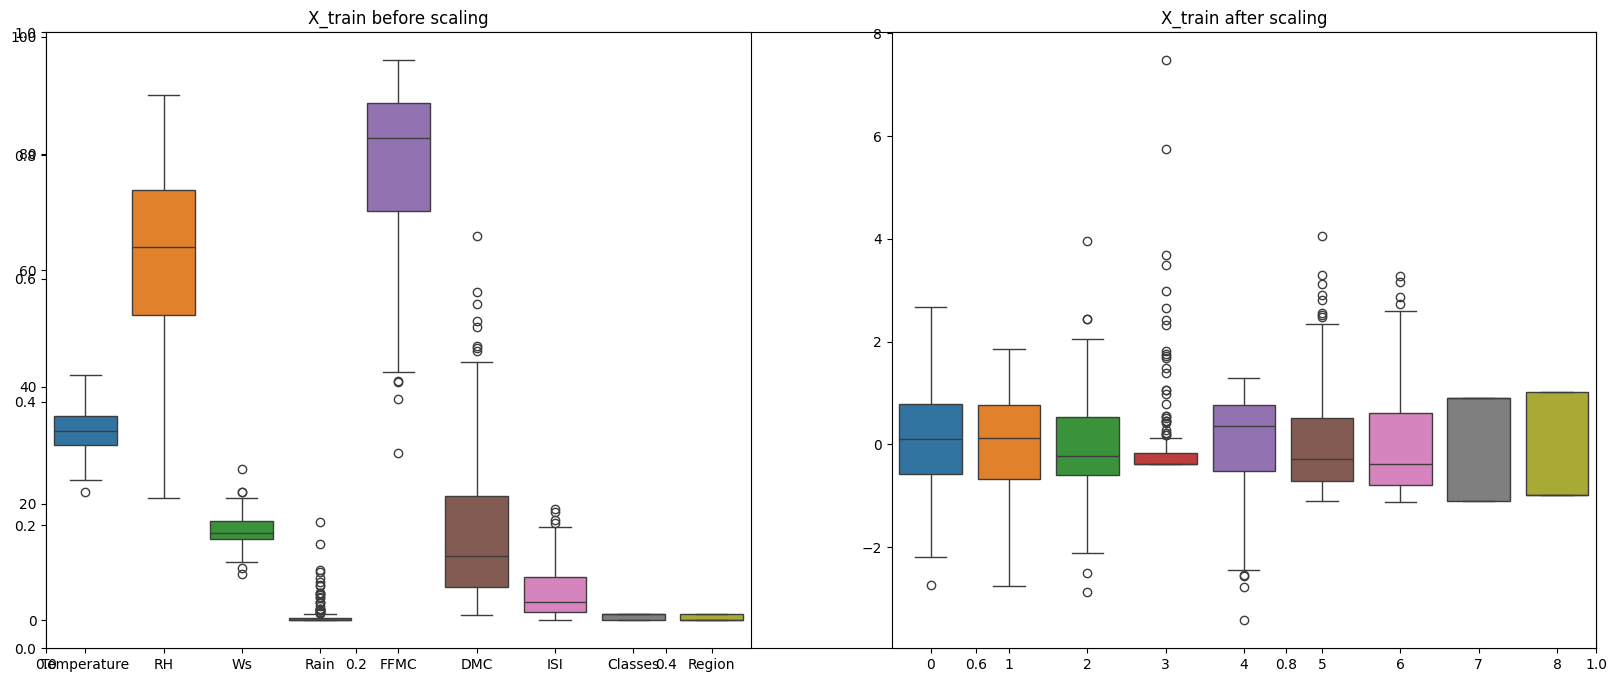

In [ ]:
# Boxplots to understand the effect of standardscaler
plt.subplots(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

# Model Training

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score",score)

Mean absolute error 0.5468236465249986
R2 score 0.9847657384266951


<ipython-input-25-eb06ecc72ec5>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


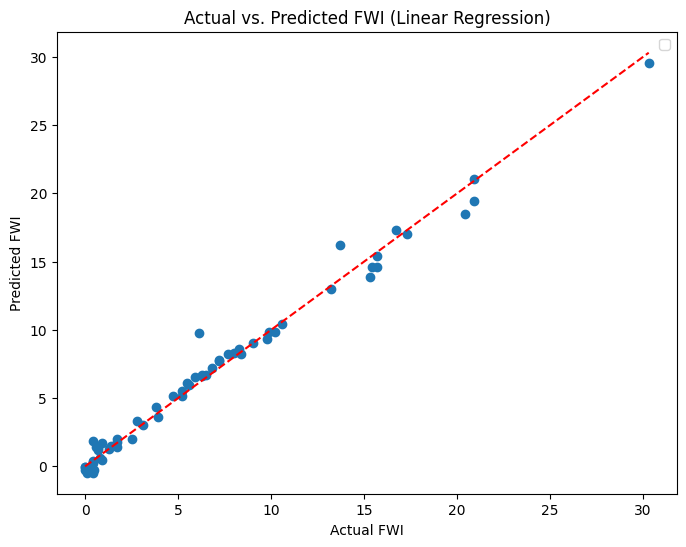

In [ ]:
# plot of best fit line and actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Best fit line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs. Predicted FWI (Linear Regression)")
plt.legend()
plt.show()

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_la=lasso.predict(X_test_scaled)
mae_la=mean_absolute_error(y_test,y_pred_la)
score_la=r2_score(y_test,y_pred_la)
print("Mean absolute error", mae_la)
print("R2 score",score_la)

Mean absolute error 1.133175994914409
R2 score 0.9492020263112388


Observation:

Compared to LinearRegression the R2 score of Lasso got decreases.
- Decrease in R2 score doesnt mean the model is performing bad. The linear regression model could be overfitting as well

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_r=ridge.predict(X_test_scaled)
mae_r=mean_absolute_error(y_test,y_pred_r)
score_r=r2_score(y_test,y_pred_r)
print("Mean absolute error", mae_r)
print("R2 score",score_r)

Mean absolute error 0.5642305340105692
R2 score 0.9842993364555513


## Elasticnet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_scaled,y_train)
y_pred_e=ElasticNet.predict(X_test_scaled)
mae_e=mean_absolute_error(y_test,y_pred_e)
score_e=r2_score(y_test,y_pred_e)
print("Mean absolute error", mae_e)
print("R2 score",score_e)

Mean absolute error 1.8822353634896005
R2 score 0.8753460589519703


# Hyperparameter Tuning

## LassoCV

In [ ]:
from sklearn.linear_model import LassoCV
lassoCV=LassoCV()
lassoCV.fit(X_train_scaled,y_train)

LassoCV()

In [ ]:
# best alpha value choosen by lassoCV
lassoCV.alpha_

0.05725391318234408

In [ ]:
# all the alphas tried by lassoCV
lassoCV.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

Mean absolute error 0.619970115826343
R2 score 0.9820946715928275


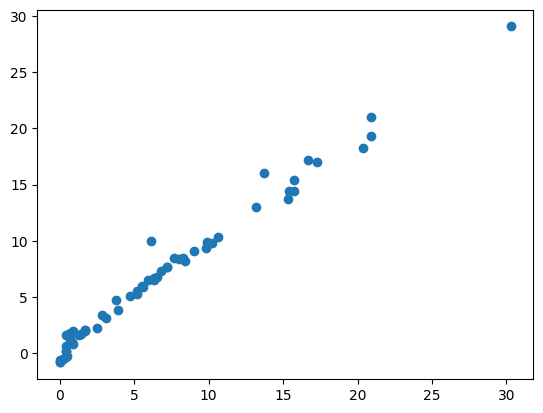

In [ ]:
y_pred_laCV=lassoCV.predict(X_test_scaled)
plt.scatter(y_test,y_pred_laCV)
mae_laCV=mean_absolute_error(y_test,y_pred_laCV)
score_laCV=r2_score(y_test,y_pred_laCV)
print("Mean absolute error", mae_laCV)
print("R2 score",score_laCV)

### RidgeCV

Mean absolute error 0.5642305340105692
R2 score 0.9842993364555513


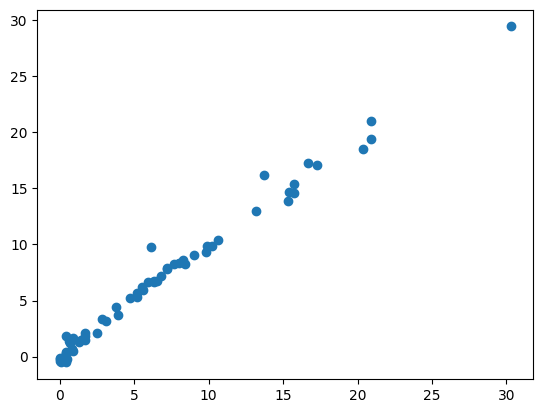

In [ ]:
from sklearn.linear_model import RidgeCV
ridgeCV=RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred_rCV=ridgeCV.predict(X_test_scaled)
plt.scatter(y_test,y_pred_rCV)
mae_rCV=mean_absolute_error(y_test,y_pred_rCV)
score_rCV=r2_score(y_test,y_pred_rCV)
print("Mean absolute error", mae_rCV)
print("R2 score",score_rCV)

### ElasticNetCV

Mean absolute error 0.6575946731430898
R2 score 0.9814217587854941


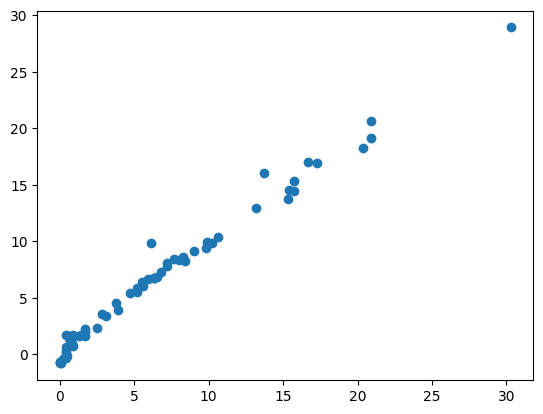

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticCV=ElasticNetCV(cv=5)
elasticCV.fit(X_train_scaled,y_train)
y_pred_eCV=elasticCV.predict(X_test_scaled)
plt.scatter(y_test,y_pred_eCV)
mae_eCV=mean_absolute_error(y_test,y_pred_eCV)
score_eCV=r2_score(y_test,y_pred_eCV)
print("Mean absolute error", mae_eCV)
print("R2 score",score_eCV)